In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import read_csv
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import seaborn as sns



In [2]:
from google.colab import files
file=files.upload()

Saving india.csv to india.csv


In [3]:
df=read_csv("india.csv",header=0)

In [4]:
df.tail()

,location,date,total_cases,new_cases,total_deaths,new_deaths
428,India,2021-04-02,12392260,89129,164110.0,714.0
429,India,2021-04-03,12485509,93249,164623.0,513.0
430,India,2021-04-04,12589067,103558,165101.0,478.0
431,India,2021-04-05,12686049,96982,165547.0,446.0
432,India,2021-04-06,12801785,115736,166177.0,630.0


In [5]:
df.shape

(433, 6)

In [6]:
new_df=pd.DataFrame(df,columns=["date","total_deaths"])
new_df.head()

,date,total_deaths
0,2020-01-30,NaN
1,2020-01-31,NaN
2,2020-02-01,NaN
3,2020-02-02,NaN
4,2020-02-03,NaN


In [7]:
new_df.columns=['ds','y']
new_df.head()


,ds,y
0,2020-01-30,NaN
1,2020-01-31,NaN
2,2020-02-01,NaN
3,2020-02-02,NaN
4,2020-02-03,NaN


In [8]:
new_df['ds']= pd.to_datetime(new_df['ds'])
new_df.head()

,ds,y
0,2020-01-30,NaN
1,2020-01-31,NaN
2,2020-02-01,NaN
3,2020-02-02,NaN
4,2020-02-03,NaN


In [9]:
train=new_df.drop(new_df.index[-150:])

In [10]:
train.shape

(283, 2)

In [11]:
train.tail()

,ds,y
278,2020-11-03,123611.0
279,2020-11-04,124315.0
280,2020-11-05,124985.0
281,2020-11-06,125562.0
282,2020-11-07,126121.0


In [12]:
model=Prophet()
model.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


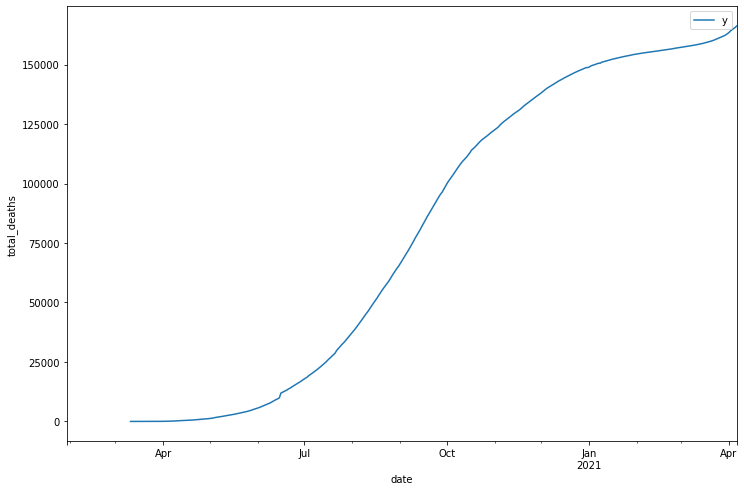

In [13]:
ax = new_df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('total_deaths')
ax.set_xlabel('date')

plt.show()

In [14]:
future_dates=model.make_future_dataframe(periods=60)
future_dates

,ds
0,2020-01-30
1,2020-01-31
2,2020-02-01
3,2020-02-02
4,2020-02-03
...,...
338,2021-01-02
339,2021-01-03
340,2021-01-04
341,2021-01-05


In [16]:
prediction = model.predict(future_dates)
prediction[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
336,2020-12-31,173930.166187,164824.819397,183315.666754
337,2021-01-01,174746.887996,164919.390284,184490.837009
338,2021-01-02,175539.156068,165424.797256,185829.658692
339,2021-01-03,176422.827846,166018.941470,186725.574019
340,2021-01-04,177185.239846,166431.445708,187828.747032
341,2021-01-05,178050.176531,167185.945491,188700.068731
342,2021-01-06,178888.717514,167724.371060,190134.882407


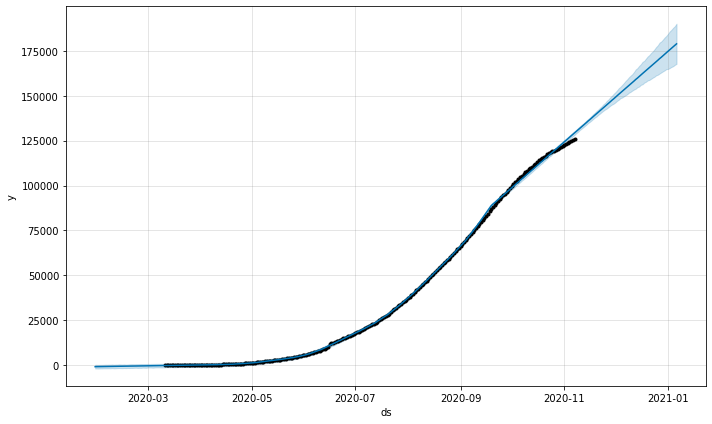

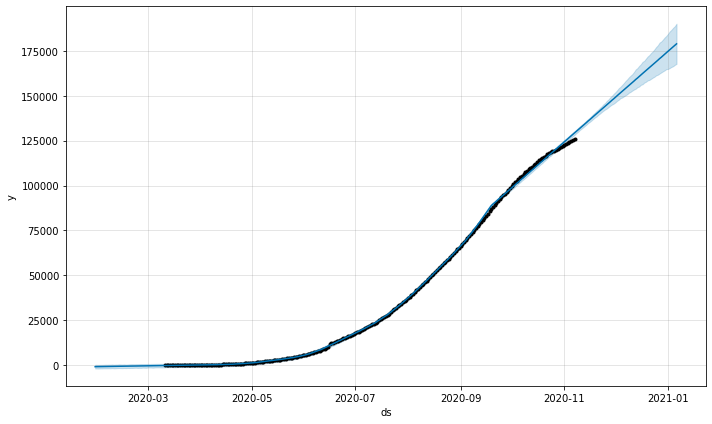

In [17]:
model.plot(prediction)

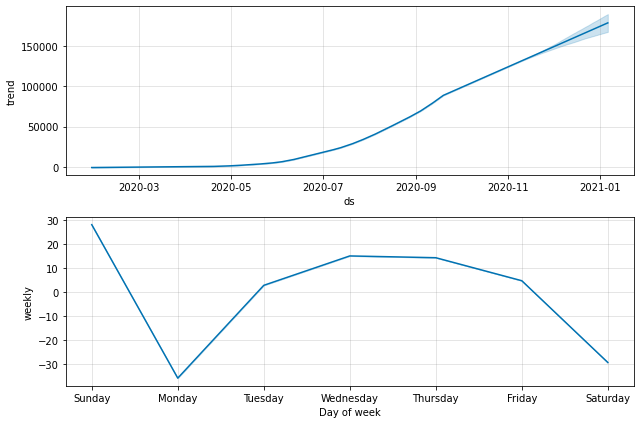

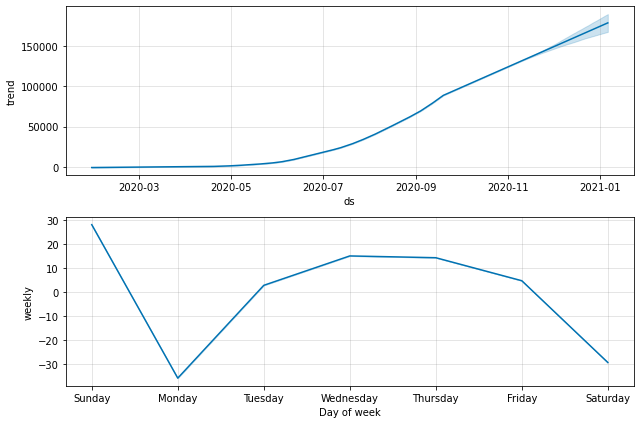

In [18]:
model.plot_components(prediction)

In [ ]:
new_df=pd.DataFrame(df,columns=["date","new_deaths"])
new_df.head()

,date,new_deaths
0,2020-01-30,NaN
1,2020-01-31,NaN
2,2020-02-01,NaN
3,2020-02-02,NaN
4,2020-02-03,NaN


In [27]:
new_df.columns=['ds','y']
new_df.head()


,ds,y
0,2020-01-30,NaN
1,2020-01-31,NaN
2,2020-02-01,NaN
3,2020-02-02,NaN
4,2020-02-03,NaN


In [28]:
new_df['ds']= pd.to_datetime(new_df['ds'])
new_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,y
0,2020-01-30,NaN
1,2020-01-31,NaN
2,2020-02-01,NaN
3,2020-02-02,NaN
4,2020-02-03,NaN


In [29]:
train=new_df.drop(new_df.index[-10:])

In [30]:
model=Prophet()
model.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


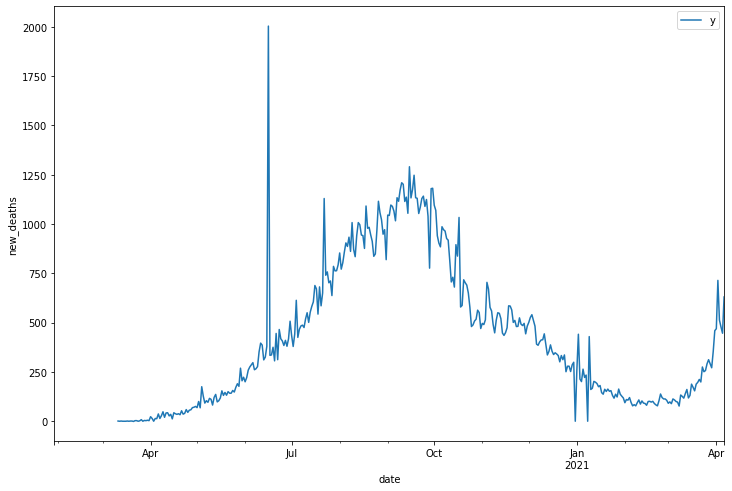

In [31]:
ax = new_df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('new_deaths')
ax.set_xlabel('date')

plt.show()

In [39]:
future = model.make_future_dataframe(periods=10, freq='D')
prediction = model.predict(future)
prediction[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
426,2021-03-31,101.345369,-66.955130,245.077139
427,2021-04-01,93.844757,-65.718594,238.597509
428,2021-04-02,88.521151,-58.640266,245.467072
429,2021-04-03,84.765906,-63.921418,237.964912
430,2021-04-04,49.006681,-100.815293,208.166026
431,2021-04-05,28.808199,-126.289107,178.316326
432,2021-04-06,107.801444,-50.314030,257.061117


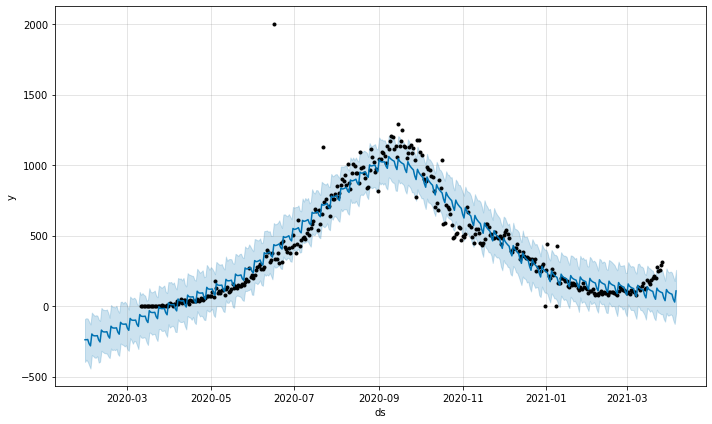

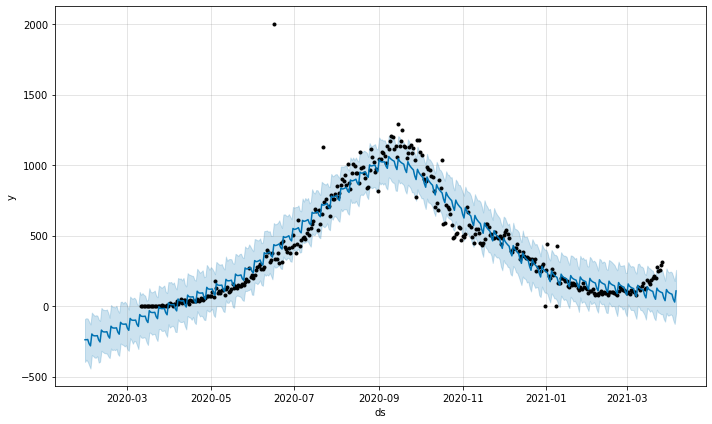

In [40]:
model.plot(prediction)

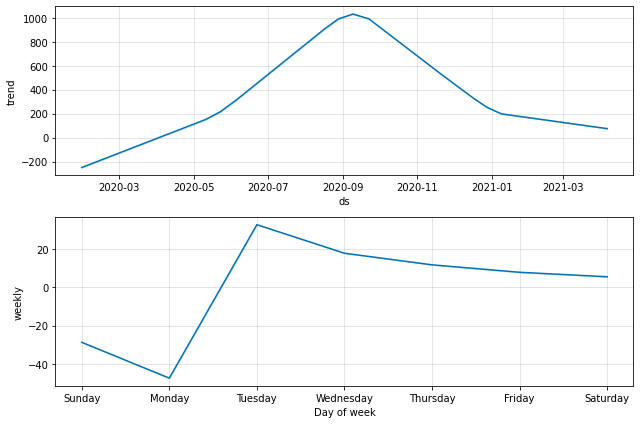

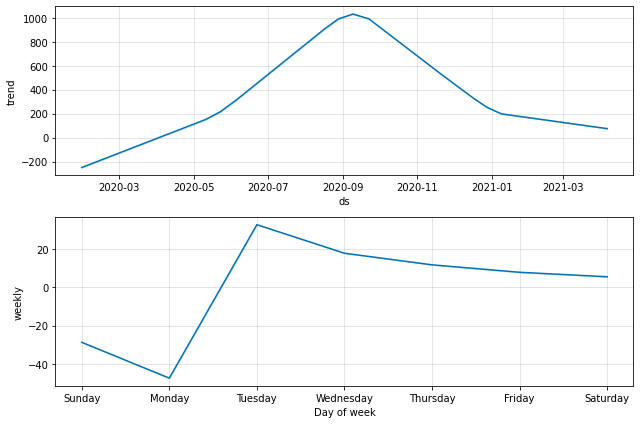

In [41]:
model.plot_components(prediction)